In [1]:
import logging
import gensim
from gensim.models import word2vec, KeyedVectors
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np
from nltk.tokenize import MWETokenizer
import itertools
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
from sklearn.manifold import TSNE

In [4]:
import pickle

# 指定pickle文件的路径
pickle_file_path = "phraser.pkl"

# 打开文件并加载数据
with open(pickle_file_path, 'rb') as file:
    model= pickle.load(file)

# 现在loaded_data中包含了pickle文件中的数据，你可以根据需要使用它


In [5]:
# model = KeyedVectors.load_word2vec_format('清洗后文本.txt')

In [6]:
# 获取所有词的词向量
word_vectors = model.vectors


AttributeError: 'FrozenPhrases' object has no attribute 'vectors'

In [13]:
tsne = TSNE(n_components=2, random_state=42)
word_vectors_tsne = tsne.fit_transform(word_vectors)

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

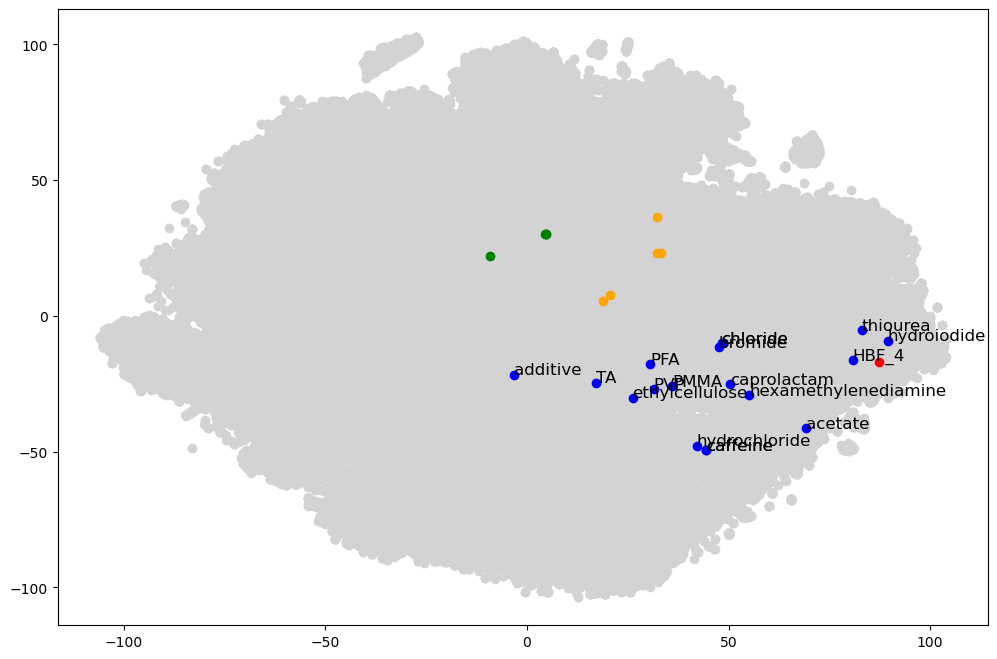

In [15]:
# 游老师那边的smart guess
word_vectors = {}
for i, word in enumerate(model.index_to_key):
    word_vectors[word] = model.get_vector(word)
    
plt.figure(figsize=(12, 8))
dpi=2000
# 绘制除高亮词汇外的点
plt.scatter(word_vectors_tsne[:, 0], word_vectors_tsne[:, 1], color='lightgray')

# 定义不同集合的高亮词汇和颜色
# highlight_words_blue = ['decane','Butane','hexamethylenediamine','octane','chloride','bromide','chloride','hydroiodide','acetamide','formamide','HBF_4','hydrochloride','acetate','water','caffeine','caprolactam','ethylcellulose','Formamide',] 
highlight_words_blue = ['additive','TA','PMMA','caffeine','thiourea','PVP','PFA','hexamethylenediamine','chloride','bromide','chloride','hydroiodide','HBF_4','hydrochloride','acetate','caffeine','caprolactam','ethylcellulose'] 
# 添加剂，KI，NaF，ZnCl2,MgI2,NiCl2,Trimesic acid (TA),Ethyl cellulose (EC),Poly(methyl methacrylate) (PMMA),Caffeine,DR3T,
highlight_words_red = ['aminoguanidine',]  # 红色高亮词汇
highlight_words_yellow = []  # 黄色高亮词汇 有机无机杂化钙钛矿
highlight_words_green = ['FAPbI_3','MAPbI_3','MAPbBr_3','CsPbBr_3'] 
highlight_words_orange = ['SnO_2','TiO_2','ZnO','Nb_2O_5','LiF'] #
# highlight_words_orange = ['SiO_2','MgO','La_2O_3','Cr_2O_3']  
# 遍历蓝色高亮词汇并绘制点
for word in highlight_words_blue:
    index = list(word_vectors.keys()).index(word)
    plt.scatter(word_vectors_tsne[index, 0], word_vectors_tsne[index, 1], color='blue')
    plt.annotate(word, (word_vectors_tsne[index, 0], word_vectors_tsne[index, 1]), fontsize=12)

# 遍历红色高亮词汇并绘制点
for word in highlight_words_red:
    index = list(word_vectors.keys()).index(word)
    plt.scatter(word_vectors_tsne[index, 0], word_vectors_tsne[index, 1], color='red')
    # plt.annotate(word, (word_vectors_tsne[index, 0], word_vectors_tsne[index, 1]), fontsi/ze=12)

for word in highlight_words_green:
    index = list(word_vectors.keys()).index(word)
    plt.scatter(word_vectors_tsne[index, 0], word_vectors_tsne[index, 1], color='green')
    # plt.annotate(word, (word_vectors_tsne[index, 0], word_vectors_tsne[index, 1]), fontsize=12)
for word in highlight_words_orange:
    index = list(word_vectors.keys()).index(word)
    plt.scatter(word_vectors_tsne[index, 0], word_vectors_tsne[index, 1], color='orange')
    # plt.annotate(word, (word_vectors_tsne[index, 0], word_vectors_tsne[index, 1]), fontsize=12)
# plt.xlim(-20,10)
# plt.ylim(0,30)
# plt.rcParams['font.family'] = 'Times New Roman' 
plt.savefig('聚类smartguess.png')  # 保存为PNG格式
plt.show()
# 删除了：

In [21]:

related_words = model.most_similar("additive", topn=1000)# 打印选择的向量名
for word in related_words:
    print(word)

('additives', 0.7568824291229248)
('defoamer', 0.6673661470413208)
('AKOR-1', 0.6585018038749695)
('binder', 0.640877902507782)
('antiseize', 0.6271000504493713)
('smoke-suppressant', 0.6179914474487305)
('deflocculant', 0.6169844269752502)
('alkylsalicylate', 0.6053966283798218)
('antifrictional', 0.6023957133293152)
('pro-degradant', 0.5959671139717102)
('AW/EP', 0.5919784903526306)
('ethylsilicate', 0.5905537009239197)
('surface-modifying', 0.5901466608047485)
('anti-friction', 0.5887197256088257)
('lignosulphonate', 0.5882198214530945)
('PMSya', 0.5881351828575134)
('alkylphenolate', 0.5879916548728943)
('defoamers', 0.5879338979721069)
('hydrophilizing', 0.5875993967056274)
('fluoroparaffins', 0.5875146985054016)
('polymer–cement', 0.5860162973403931)
('anti-foam', 0.5840886235237122)
('PPC-based', 0.5835869312286377)
('MASK', 0.5827519297599792)
('polymer-bitumen', 0.5813413262367249)
('erucamide', 0.5795539617538452)
('nano-MoS_3', 0.5787792205810547)
('nanomodifier', 0.57809215

In [17]:
related_words = model.most_similar("additive", topn=1000)

for idx, (word, score) in enumerate(related_words):
    print(f"{idx + 1}. Word: {word}, Similarity Score: {score}")

1. Word: additives, Similarity Score: 0.7568824291229248
2. Word: defoamer, Similarity Score: 0.6673661470413208
3. Word: AKOR-1, Similarity Score: 0.6585018038749695
4. Word: binder, Similarity Score: 0.640877902507782
5. Word: antiseize, Similarity Score: 0.6271000504493713
6. Word: smoke-suppressant, Similarity Score: 0.6179914474487305
7. Word: deflocculant, Similarity Score: 0.6169844269752502
8. Word: alkylsalicylate, Similarity Score: 0.6053966283798218
9. Word: antifrictional, Similarity Score: 0.6023957133293152
10. Word: pro-degradant, Similarity Score: 0.5959671139717102
11. Word: AW/EP, Similarity Score: 0.5919784903526306
12. Word: ethylsilicate, Similarity Score: 0.5905537009239197
13. Word: surface-modifying, Similarity Score: 0.5901466608047485
14. Word: anti-friction, Similarity Score: 0.5887197256088257
15. Word: lignosulphonate, Similarity Score: 0.5882198214530945
16. Word: PMSya, Similarity Score: 0.5881351828575134
17. Word: alkylphenolate, Similarity Score: 0.587

In [28]:
# 所有词语
words = ['TSC','aminoguanidine','TA','PMMA','caffeine','thiourea','PVP','PFA','hexamethylenediamine','chloride','bromide','chloride','hydroiodide','HBF_4','hydrochloride','acetate','caffeine','caprolactam','ethylcellulose']

# 计算每个词与 "additive" 之间的相似度
similarities = [(word, model.similarity(word, "additive")) for word in words]

# 根据相似度进行排序
sorted_similarities = sorted(similarities, key=lambda x: x[1], reverse=True)

# 打印排名
for idx, (word, similarity_score) in enumerate(sorted_similarities):
    print(f"{idx + 1}. Word: {word}, Similarity Score: {similarity_score}")

1. Word: PVP, Similarity Score: 0.43846800923347473
2. Word: ethylcellulose, Similarity Score: 0.41087183356285095
3. Word: chloride, Similarity Score: 0.3673631548881531
4. Word: chloride, Similarity Score: 0.3673631548881531
5. Word: HBF_4, Similarity Score: 0.3430689573287964
6. Word: acetate, Similarity Score: 0.3244280219078064
7. Word: PFA, Similarity Score: 0.32166096568107605
8. Word: bromide, Similarity Score: 0.3192000389099121
9. Word: hexamethylenediamine, Similarity Score: 0.28236669301986694
10. Word: caprolactam, Similarity Score: 0.2667461335659027
11. Word: PMMA, Similarity Score: 0.25672754645347595
12. Word: caffeine, Similarity Score: 0.2530464828014374
13. Word: caffeine, Similarity Score: 0.2530464828014374
14. Word: thiourea, Similarity Score: 0.24806451797485352
15. Word: hydrochloride, Similarity Score: 0.23525258898735046
16. Word: aminoguanidine, Similarity Score: 0.23479168117046356
17. Word: TSC, Similarity Score: 0.20003674924373627
18. Word: hydroiodide, 